<h1 align="center"> 
Web Scraping & Time Series Analysis for 3 Major Movie Studios </h1> 
<h1 align="center"> Box Office Revenue </h1> 
<h3 align="center"> 
(Data Resource: https://www.boxofficemojo.com/)
</h3>

<h2 align="center"> 
Yupeng Yang
</h2> 
<h2 align="center"> 
Novemver 17, 2018 
</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from bs4 import BeautifulSoup
import requests
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import display
pd.set_option('display.precision', 2)
plt.style.use('ggplot')
py.sign_in('yupengplot','AX1rMnJnZeIFquaxkXOi')
plotly.offline.init_notebook_mode()

# Web Scraping (3 major studios)

## 1. DISNEY

In [2]:
links=[] #Set up a list to append all urls from 2000 to 2018 for every quarter.
times=[] #Set up a list to append all times from 2000 to 2018 for every quarter.
for i in range(2000,2018+1): #from 2000 to 2018
    for n in range(1,4+1): #from Q1 to Q4
        url = 'https://www.boxofficemojo.com/studio/chart/?view=company&view2=&yr='+str(i)+'&timeframe=Q'+str(n)+'&sort=&order=&studio=buenavista.htm'
        links.append(url)
        times.append(str(i)+'-Q'+str(n))

In [3]:
#Data Scraping Process...
Total=[]    
for i in links:
    r = requests.get(i)
    soup = BeautifulSoup(r.content, 'html.parser')
    data=soup.find_all('td',attrs={"align":"right"})

    items=[]
    for item in data:
        items.append(item.text)
    try:
        total=items[items.index('Totals:')+1]
    except: pass
    Total.append(total)
    #Total = [x.replace("$", "") for x in Total]
    #Total = [x.replace(',','') for x in Total]
Total=pd.DataFrame(Total)
times=pd.DataFrame(times)

In [4]:
#Merge time and value to a new dataframe
disney=pd.merge(times, Total, left_index=True, right_index = True)
disney.columns=['Time','Revenue_Disney']
disney.head()

Time Revenue_Disney
0  2000-Q1   $317,028,612
1  2000-Q2   $354,794,205
2  2000-Q3   $199,396,811
3  2000-Q4   $304,428,744
4  2001-Q1   $158,363,429

In [5]:
#Format the number of results.
disney['Revenue_Disney'] = [x.replace("$", "") for x in disney['Revenue_Disney']]
disney['Revenue_Disney'] = [x.replace(",", "") for x in disney['Revenue_Disney']]
disney['Revenue_Disney']=disney['Revenue_Disney'].astype(int)/1000000 #Change values unit to millions
disney=disney.set_index('Time')
disney.tail()

Revenue_Disney
Time                   
2017-Q4         1008.72
2018-Q1          866.33
2018-Q2         1375.08
2018-Q3          508.86
2018-Q4          137.84

In [6]:
#Exploratory data analysis
disney.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 2000-Q1 to 2018-Q4
Data columns (total 1 columns):
Revenue_Disney    76 non-null float64
dtypes: float64(1)
memory usage: 1.2+ KB


In [7]:
disney.describe()

Revenue_Disney
count           76.00
mean           396.00
std            248.84
min             54.77
25%            253.79
50%            315.98
75%            465.36
max           1375.08

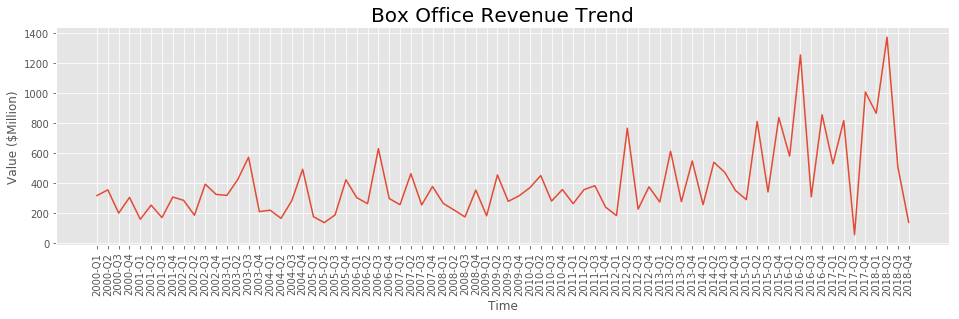

In [8]:
#visualize the box office revenue trend.
plt.figure(figsize=(16,4))
plt.title('Box Office Revenue Trend',fontsize=20)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Value ($Million)',fontsize=12)
plt.grid(True)
plt.xticks(rotation=90)
plt.plot(disney)

## 2. SONY

In [9]:
links=[] #Set up a list to append all urls from 2000 to 2018 for every quarter.
times=[] #Set up a list to append all times from 2000 to 2018 for every quarter.
for i in range(2000,2018+1):
    for n in range(1,4+1):
        url = 'https://www.boxofficemojo.com/studio/chart/?view=company&view2=&yr='+str(i)+'&timeframe=Q'+str(n)+'&sort=&order=&studio=tristar.htm'
        links.append(url)
        times.append(str(i)+'-Q'+str(n))

In [10]:
#Data Scraping Process...
Total=[]    
for i in links:
    r = requests.get(i)
    soup = BeautifulSoup(r.content, 'html.parser')
    data=soup.find_all('td',attrs={"align":"right"})

    items=[]
    for item in data:
        items.append(item.text)
    try:
        total=items[items.index('Totals:')+1]
    except: pass
    Total.append(total)
    #Total = [x.replace("$", "") for x in Total]
    #Total = [x.replace(',','') for x in Total]
Total=pd.DataFrame(Total)
times=pd.DataFrame(times)

In [11]:
#Merge time and value to a new dataframe
sony=pd.merge(times, Total, left_index=True, right_index = True)
sony.columns=['Time','Revenue_Sony']
sony.tail()

Time  Revenue_Sony
71  2017-Q4  $267,026,973
72  2018-Q1  $379,925,506
73  2018-Q2   $41,201,219
74  2018-Q3  $419,132,402
75  2018-Q4  $278,675,135

In [12]:
#Format the number of results.
sony['Revenue_Sony'] = [x.replace("$", "") for x in sony['Revenue_Sony']]
sony['Revenue_Sony'] = [x.replace(",", "") for x in sony['Revenue_Sony']]
sony['Revenue_Sony']=sony['Revenue_Sony'].astype(int)/1000000 #Change values unit to millions
sony=sony.set_index('Time')
sony.head()

Revenue_Sony
Time                 
2000-Q1        157.13
2000-Q2         88.37
2000-Q3        212.34
2000-Q4        223.63
2001-Q1        201.24

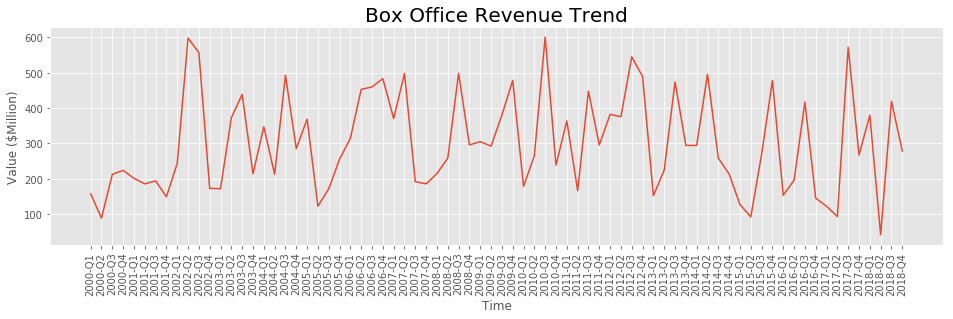

In [13]:
#visualize the box office revenue trend.
plt.figure(figsize=(16,4))
plt.title('Box Office Revenue Trend',fontsize=20)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Value ($Million)',fontsize=12)
plt.grid(True)
plt.xticks(rotation=90)
plt.plot(sony)

## 3. Lionsgate

In [14]:
links=[] #Set up a list to append all urls from 2000 to 2018 for every quarter.
times=[] #Set up a list to append all times from 2000 to 2018 for every quarter.
for i in range(2000,2018+1):
    for n in range(1,4+1):
        url = 'https://www.boxofficemojo.com/studio/chart/?view=company&view2=&yr='+str(i)+'&timeframe=Q'+str(n)+'&sort=&order=&studio=pantelion.htm'
        links.append(url)
        times.append(str(i)+'-Q'+str(n))

In [15]:
#Data Scraping Process...
Total=[]    
for i in links:
    r = requests.get(i)
    soup = BeautifulSoup(r.content, 'html.parser')
    data=soup.find_all('td',attrs={"align":"right"})

    items=[]
    for item in data:
        items.append(item.text)
    try:
        total=items[items.index('Totals:')+1]
    except: pass
    Total.append(total)
    #Total = [x.replace("$", "") for x in Total]
    #Total = [x.replace(',','') for x in Total]
Total=pd.DataFrame(Total)
times=pd.DataFrame(times)

In [16]:
#Merge time and value to a new dataframe
lionsgate=pd.merge(times, Total, left_index=True, right_index = True)
lionsgate.columns=['Time','Revenue_Lionsgate']
lionsgate.tail()

Time Revenue_Lionsgate
71  2017-Q4      $236,322,743
72  2018-Q1       $97,916,312
73  2018-Q2      $100,737,319
74  2018-Q3      $127,238,730
75  2018-Q4       $46,614,498

In [17]:
#Format the number of results.
lionsgate['Revenue_Lionsgate'] = [x.replace("$", "") for x in lionsgate['Revenue_Lionsgate']]
lionsgate['Revenue_Lionsgate'] = [x.replace(",", "") for x in lionsgate['Revenue_Lionsgate']]
lionsgate['Revenue_Lionsgate']=lionsgate['Revenue_Lionsgate'].astype(int)/1000000 #Change values unit to millions
lionsgate=lionsgate.set_index('Time')
lionsgate.head()

Revenue_Lionsgate
Time                      
2000-Q1               4.08
2000-Q2              18.48
2000-Q3               6.20
2000-Q4               4.30
2001-Q1               8.52

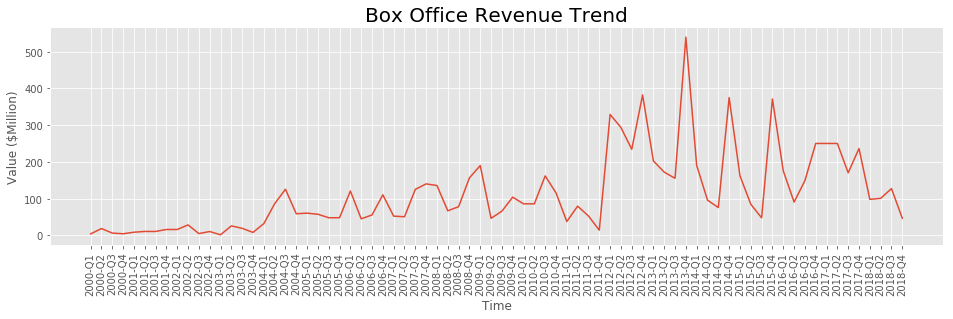

In [18]:
#visualize the box office revenue trend.
plt.figure(figsize=(16,4))
plt.title('Box Office Revenue Trend',fontsize=20)
plt.xlabel('Time',fontsize=12)
plt.ylabel('Value ($Million)',fontsize=12)
plt.grid(True)
plt.xticks(rotation=90)
plt.plot(lionsgate)

In [19]:
studios=pd.merge(pd.merge(disney,sony,on='Time')
                        ,lionsgate,on='Time')
studios.head(10) #Unit: Million

Revenue_Disney  Revenue_Sony  Revenue_Lionsgate
Time                                                    
2000-Q1          317.03        157.13               4.08
2000-Q2          354.79         88.37              18.48
2000-Q3          199.40        212.34               6.20
2000-Q4          304.43        223.63               4.30
2001-Q1          158.36        201.24               8.52
2001-Q2          252.90        185.39              10.59
2001-Q3          169.49        193.76              10.59
2001-Q4          307.04        148.94              15.93
2002-Q1          284.93        243.44              15.93
2002-Q2          185.56        598.32              28.45

In [20]:
# writer = pd.ExcelWriter('studios.xlsx')
# studios.to_excel(writer,'Sheet1')
# writer.save()

# studios = pd.read_excel('studios.xlsx',index_col=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c0f15b630>,
      dtype=object)

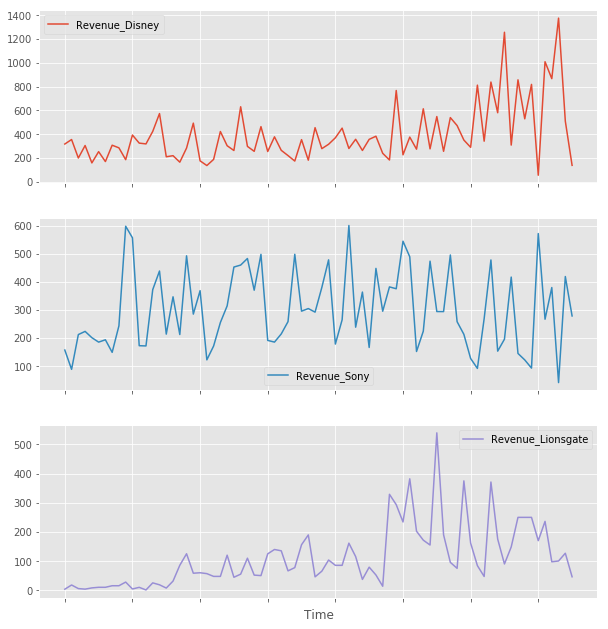

In [21]:
# Plot 3 studios revenue trends togather
studios.plot(subplots=True, figsize=(10,12))

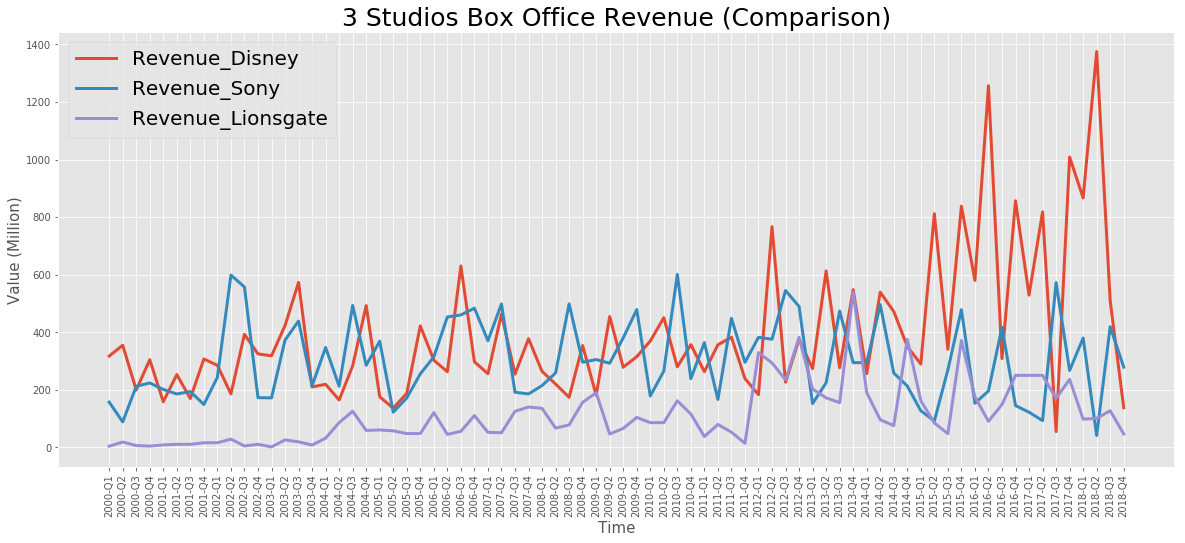

In [22]:
#plot line chart to show the 3 major movie studios box office revenues in time series:
studios_transfer=studios.T
def plotname(studios):
    data = studios_transfer.loc[studios]
    plt.grid(True)
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('Value (Million)',fontsize=15)
    plt.title("3 Studios Box Office Revenue (Comparison)",fontsize=25)
    plt.xticks(rotation=90)
    plt.plot(data, linewidth=3)

plt.figure(figsize=(20,8))
names=['Revenue_Disney','Revenue_Sony','Revenue_Lionsgate']
for name in names:
    plotname(name)
plt.legend(names,fontsize=20)
plt.show()

# Time Series Analysis

## 1.Rolling Average

### Comparing the 3 Studio revenue trends by their rolling average, which is a smoother version of the original trend plot (by calculating the sum of previous 3 quarters revenue and later 3 quarters revenue then divided by 6). 

### We can see the tendency of revenues more clearly: From 2000 to 2018, Disney and Lionsgate are uptrend in general, but Sony is up and down.

In [23]:
#plot the 3 major movie studios rolling mean trend (a smoother version of the original plot):
def plotname(m):
    plt.grid(True)
    plt.xlabel('Time',fontsize=15)
    plt.ylabel('Value (Million)',fontsize=15)
    plt.title("Rolling Mean",fontsize=20)
    plt.xticks(rotation=90)
    plt.plot(m[0], linewidth=3)
    plt.plot(m[1], linewidth=1)
    plt.legend(['rolling_average','real_revenue'],fontsize=16, loc=2)

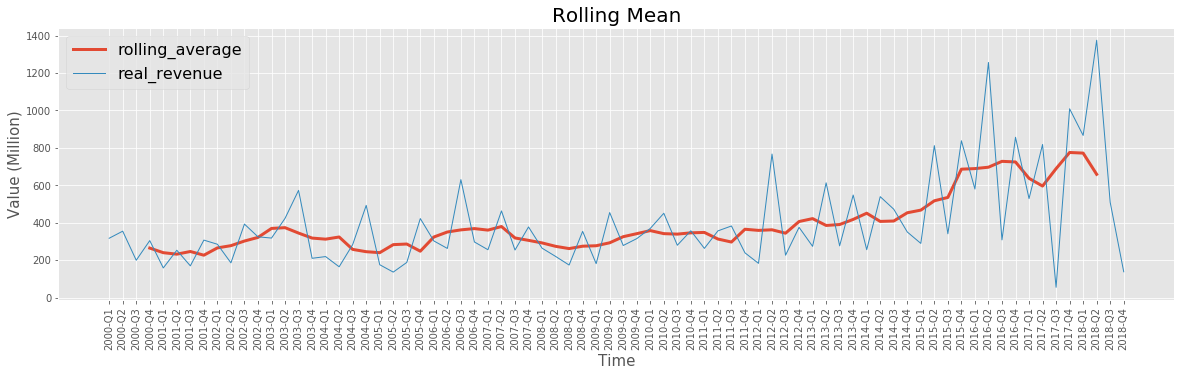

In [24]:
#Disney
rolling_mean_disney = studios["Revenue_Disney"].rolling(6,center=True).mean()
plt.figure(figsize=(20,5))
m=[rolling_mean_disney,studios["Revenue_Disney"]]
plotname(m)
plt.show()

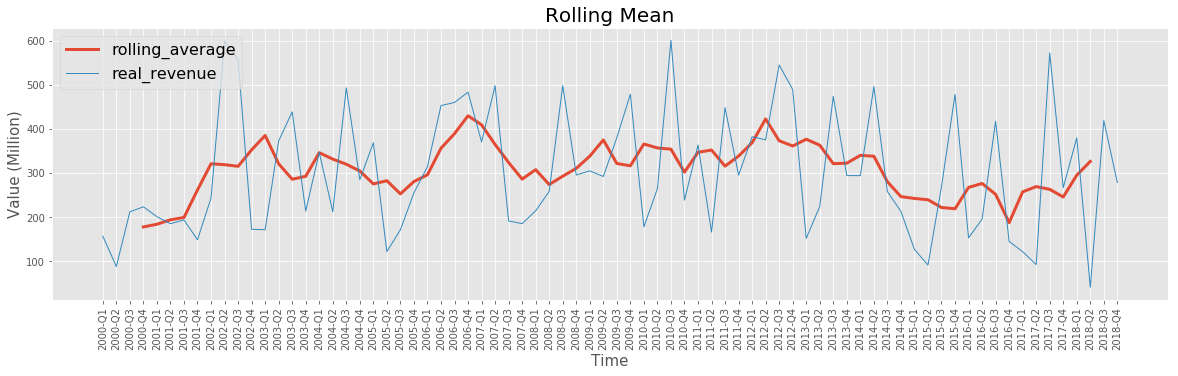

In [25]:
#Sony
rolling_mean_sony = studios["Revenue_Sony"].rolling(6,center=True).mean()
plt.figure(figsize=(20,5))
m=[rolling_mean_sony,studios["Revenue_Sony"]]
plotname(m)
plt.show()
#SONY

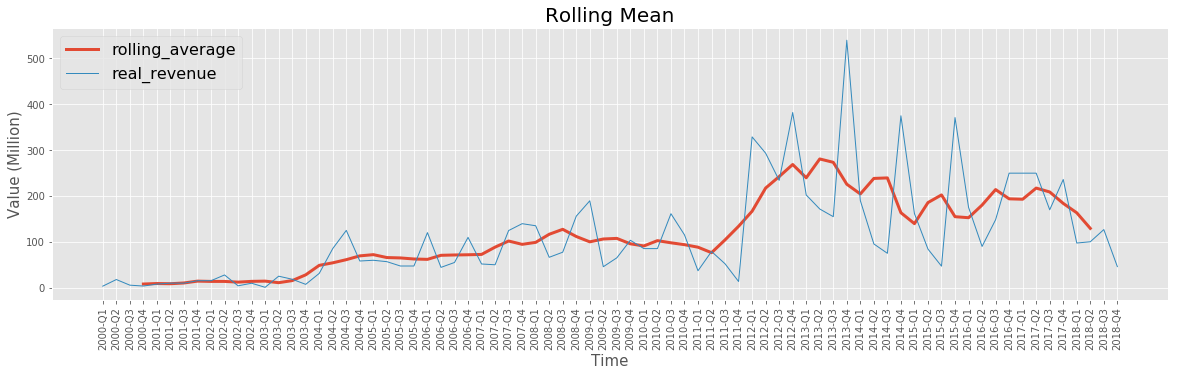

In [26]:
#Lionsgate
rolling_mean_lionsgate = studios["Revenue_Lionsgate"].rolling(6,center=True).mean()
plt.figure(figsize=(20,5))
m=[rolling_mean_lionsgate,studios["Revenue_Lionsgate"]]
plotname(m)
plt.show()
#LIONSGATE

## 2.Normalization

### Comparing the 3 Studio revenue trends by normalizing them. Divid each quarter's revenue from 2000 to 2018 by the first element, which is the first quarter in 2000. This way can make these series start from the same point and easily compare the growth rate. 

### We can conclude the box office revenue growth rate of Lionsgate is faster than other two studios.

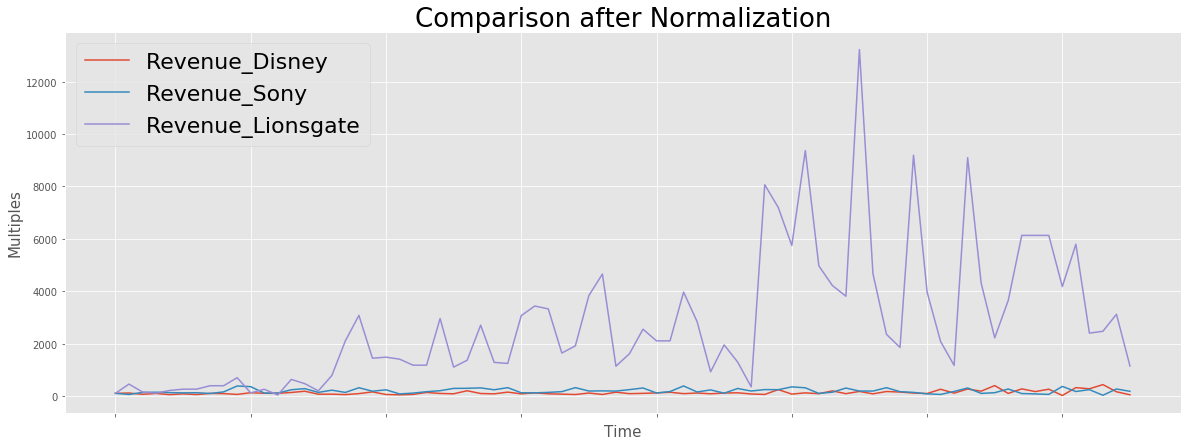

In [27]:
#Lionsgate outperforms other 2 companies revenue growth.
#Comparison after normalization:
plt.figure(figsize=(20,7))
normalized_revenue_disney = studios.Revenue_Disney.div(studios.Revenue_Disney.iloc[0]).mul(100)
normalized_revenue_sony = studios.Revenue_Sony.div(studios.Revenue_Sony.iloc[0]).mul(100)
normalized_revenue_lionsgate = studios.Revenue_Lionsgate.div(studios.Revenue_Lionsgate.iloc[0]).mul(100)
normalized_revenue_disney.plot()
normalized_revenue_sony.plot()
normalized_revenue_lionsgate.plot()

plt.xlabel('Time',fontsize=15)
plt.ylabel('Multiples',fontsize=15)
plt.title("Comparison after Normalization",fontsize=26)
plt.legend(['Revenue_Disney','Revenue_Sony','Revenue_Lionsgate'],fontsize=22,loc=2)
plt.show()

## 3.Stationarity

### Property of Stationary time series: Observations in a stationary time series are independent to time and no trend or seasonal effects.

### Check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. The reason is that classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary. (Reference: https://machinelearningmastery.com/time-series-data-stationary-python/)

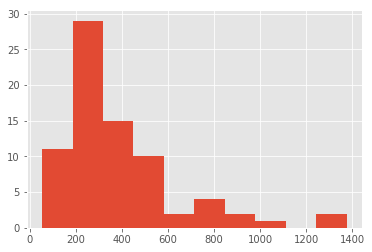

In [28]:
series=studios.Revenue_Disney
series.hist()  
#Generally take a look at the distribution for Disney, which is right-skewed. So the revenue trend of box office not stationary.

In [29]:
#Evenly split the time series into two contiguous sequences, then calculate mean and variance of each group
split = len(studios.iloc[:,0]) / 2
X1, X2 = studios.iloc[0:int(split),0], studios.iloc[int(split):,0]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))
#we can see the mean and variance of the two parts look very different.
#We have a non-stationary time series for Disney

mean1=298.577527, mean2=493.414973
variance1=13975.331574, variance2=92044.333913


## Augmented Dickey-Fuller test

### Using the Augmented Dickey-Fuller (ADF) test to see whether the time series is stationary or not.
### The null hypothesis of the test is that the trend is not stationary (has some time-dependent structure). 
### The alternate hypothesis is that the time series is stationary.

In [30]:
for i in names:
    result = adfuller(studios.loc[:,i])
    print(str(i))
    print('ADF Statistic: ' +str(result[0]))
    print('p-value: ' +str(result[1]))
    print('*************************************')
    
# Based on the p-values, conclusion:

# Rejecting the null hypothesis of Sony: 
# The time series is stationary or does not have time-dependent structure.

# Fail to reject the null hypothesis of Disney and Lionsgate: 
# So the time series is non-stationary, they have time-dependent structures.

Revenue_Disney
ADF Statistic: -1.68386429981438
p-value: 0.4394446621150174
*************************************
Revenue_Sony
ADF Statistic: -7.883909559619487
p-value: 4.6241477427035216e-12
*************************************
Revenue_Lionsgate
ADF Statistic: -1.7888596433765749
p-value: 0.3860064295994641
*************************************


## 4.Forescasting (ARIMA model)

### 👉Autoregressive Integrated Moving Average (ARIMA) Model
### (Reference: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

In [31]:
#Load required Packages
import itertools
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Split the dataset into train and test sets

In [32]:
# Using the train set to fit the model;
# Generate a prediction for each element on the test set.
data = studios['Revenue_Disney'].values
size = int(len(data) * 0.7)
train = data[0:size]
test = data[size:len(data)]

### ARIMA model implementation (A Example for Disney)

In [33]:
#AR:(p) The number of lag observations included in the model, also called the lag order.
#I:(d) The number of times that the raw observations are differenced (make the time series stationary).
#MA:(q) The size of the moving average window, also called the order of moving average.
p=d=q=range(0,6) # Set different p,d,q values to find the minimum MSE.
pdq_groups = list(itertools.product(p,d,q))#A list (iteration) includes from (0,0,0) to (5,5,5)
for pdq in pdq_groups:
    try:
        history = train.tolist() #keep track of all observations in a list.
        predictions = []
        for t in range(len(test)):
            model = ARIMA(history, order=pdq) #apply the ARIMA model
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
        error = mean_squared_error(test, predictions)
        print('(p,d,q)='+str(pdq)+':')
        print('Test MSE: %.3f' % error)
    except:
        continue

(p,d,q)=(0, 0, 0):
Test MSE: 169538.115
(p,d,q)=(0, 0, 1):
Test MSE: 170718.378
(p,d,q)=(0, 0, 2):
Test MSE: 158113.222
(p,d,q)=(0, 0, 3):
Test MSE: 154946.310
(p,d,q)=(0, 1, 0):
Test MSE: 256297.419
(p,d,q)=(0, 1, 1):
Test MSE: 133256.769
(p,d,q)=(0, 2, 0):
Test MSE: 854316.664
(p,d,q)=(0, 2, 1):
Test MSE: 262634.960
(p,d,q)=(1, 0, 0):
Test MSE: 172010.238
(p,d,q)=(1, 1, 0):
Test MSE: 147552.251
(p,d,q)=(1, 1, 1):
Test MSE: 130241.767
(p,d,q)=(1, 2, 0):
Test MSE: 203233.665
(p,d,q)=(2, 0, 0):
Test MSE: 154133.546
(p,d,q)=(2, 1, 0):
Test MSE: 161451.731
(p,d,q)=(2, 1, 1):
Test MSE: 150710.691
(p,d,q)=(2, 2, 0):
Test MSE: 240572.882
(p,d,q)=(3, 0, 0):
Test MSE: 158332.607
(p,d,q)=(3, 1, 0):
Test MSE: 114970.364
(p,d,q)=(3, 2, 1):
Test MSE: 120060.726
(p,d,q)=(4, 0, 0):
Test MSE: 127596.637
(p,d,q)=(4, 1, 0):
Test MSE: 126388.889
(p,d,q)=(4, 2, 0):
Test MSE: 179760.995
(p,d,q)=(4, 2, 1):
Test MSE: 131771.704
(p,d,q)=(5, 0, 0):
Test MSE: 137035.886
(p,d,q)=(5, 1, 0):
Test MSE: 119409.822


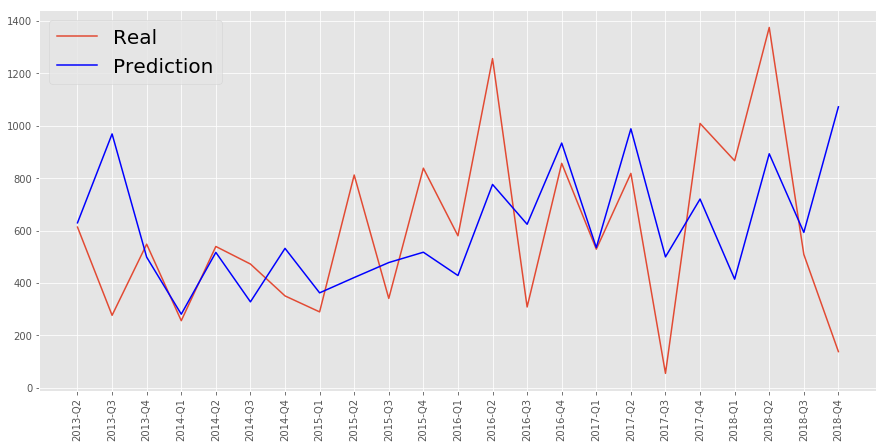

In [34]:
# Take a look at the prediction result when using (3,1,0) as the value of p,d,q
history = data.tolist()
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
testT = studios['Revenue_Disney'][int(len(data) * 0.7):len(studios['Revenue_Disney'])]
plt.figure(figsize=(15,7))
plt.plot(testT)
plt.plot(predictions, color='blue')
plt.xticks(rotation=90)
plt.legend(['Real','Prediction'],fontsize=20)
plt.show()

#Visually, we can see the trend prediction (blue line) for Disney (2013-2018) is generally similar with the real trend (red line)
